# Decision Trees

**Decision Trees: Classification:** 

- A Decision Tree which target variable is categorical (i.e. Yes/No). For classification type features, one algorithm we can use as the splitting criteria is entropy, which measures the uncertainty (i.e. how many bits needed to tell if x is positive or negative). The lower the entropy, the more predictable the class is and for higher entropy values, it becomes more unpredictable. Computing the difference between the entropies before (i.e. parent node) and after the split (i.e. sub-nodes) yields the information gain. Our objective function is to maximize the information gain at each split, thus the attribute with the highest change in entropy is used as the splitting criteria. Finally, at prediction time, when an unseen data observation falls into a terminal node, the class obtained is just the mode response of the training observations falling in that region.


- Several classification performance metrics can be utilized to show how well the model generalizes to out-of-sample data: Precision: How many returned documents are true (i.e. of those selected for intervention, how many actually need intervention). Recall: How many positives does the model return (i.e. of those needing intervention, how many of them were identified). F1: harmonic mean of precision to recall (use this performance metric when labels are imbalanced).


- We can also look at the Confusion Matrix which can be in the form of a heatmap and indicates the numbers of true positives, true negatives, false positives, and false negatives for each class label; this gives a more detailed analysis than calculating the accuracy, which is just computing the proportion of correct guesses. Accuracy can give some misleading results, especially when the dataset is unbalances and is not a reliable metric when examining the performance of a classifier.


**Decision Trees: Regression:** 

- This algorithm is takes the same approach as the Classification trees, however we use the standard deviation reduction algorithm as the splitting criteria. Remember, in regression we want to predict a continuous dependent variable from a number of independent variables. For example, instead now of predicting whether or not we will play tennis today, we predict how many hours will you play. First, we compute the standard deviation of the target column. Next, the parent node is then split into subsets and the standard deviation for each subset variable is calculated. Finally, the weighted standard deviation of each subset is then subtracted from the standard deviation of the parent node. The attribute with the highest change in variance is then used to split at the decision node. This process is repeated until each leaf is pure or a specified max_depth is given. At prediction time, when an unseen data observation falls into a terminal node, the value obtained is just the “mean” of the training observations falling in that region.


- Note: We can only split on one attribute at a time (i.e. horizontal or vertical boundary lines). It will take a while to get the separation that a regression or Naïve Bayes algorithm that would take pretty quickly. Therefore, you will need a tree with lots of nodes, and however, as increasing the complexity of the tree increases, so does the likelihood of overfitting of the data.

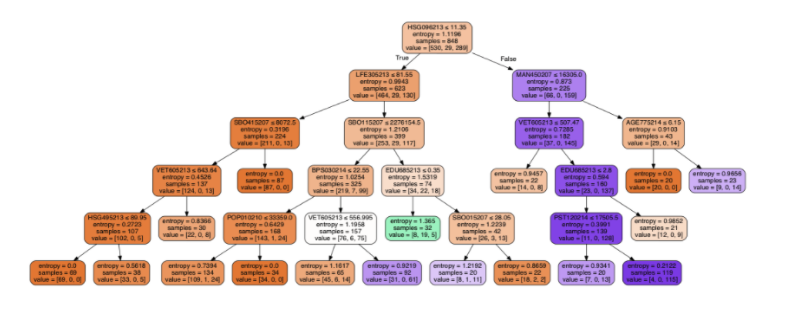

In [3]:
from IPython.display import Image
Image('../sources/decision_tree.png')

## Impurity Measurements:

- For classification problems, one algorithm used for the splitting criteria in a decision tree is entropy. At each node, the feature with the lowest entropy, or the highest change in information gain is chosen to split. The smaller the entropy is, the better as it is more predictable and requires less information to describe it. On the other hand, the more impure node requires more information. Therefore, the information theory measures the disorganization in a system known as Entropy. Once the entropy is calculated for all of the features of the given sub-set, the feature with the greatest change in entropy is selected to split. Entropy is computed as follows: (-plog2p-qlog2q). Note: p is the probability of success and q is probability of failure. In summary, we first compute the entropy of parent node and then calculate the entropy of each individual node of split and calculate weighted average of all the sub-nodes.


- $ Entropy = - \sum{p(j|t)log_{2}(p(j|t))}$


- $Information Gain = - \sum{\frac{n_{i}}{n}*Entropy(i)}$


**Gini Index**

Likewise, Gini Index is a measurement of impurity.

- $ Gini(t) = 1 - \sum{p(j|t)^{2}}$

The above equation computes the impurity of the child node. To compute the Gini index for each group, we must then weighted by the size of the group, relative to all of the samples in the parent node. The equation is then:


- $Gini(t) = 1 - \sum{p(j|t)^{2}} * \frac{n_{g}}{n_{total}}$


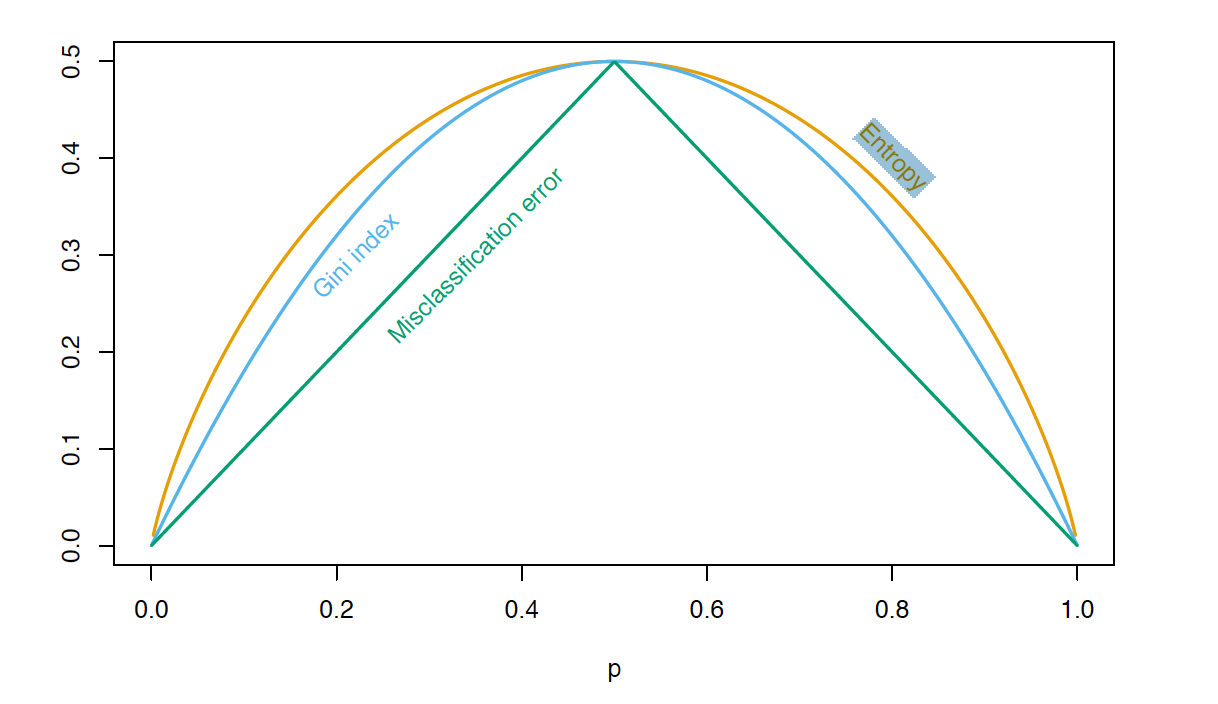

In [7]:
Image('../sources/impurity.png')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example of Computing Gini Index

In [224]:
def build_tree(train,max_depth,min_size):
    
    #Get Labels 
    labels = train[:,-1]
    
    
    #First get root node -- highest information gain to split on
    root_node = get_split(train,labels)
    
    print('*** Root Node Summary ***')
    print('Split Feature: ',root_node['feature'])
    print('Split Value: ', root_node['value'])

    #Recursive Splitting on the Root Node
    split(root_node,max_depth,min_size,1,labels)

def compute_gini_index(feats,labels):
    
    """ Compute GINI Index for Split 
    
    Keyword arguments:
    feats -- input features with left/right splits and index of row (list of tuples)
    labesl -- input class labels
    """
    
    #Total Number of instances
    n_total = len(labels)
    
    #Gini Index Score
    gini = 0
    
    #Iterate over list of tuples (first index in list == left split)
    for idx,row in enumerate(feats):
        
        #Examine right/right splits
        split = feats[idx]
        
        #Access second element in tuple for index of instance
        index_labels = [i[1] for i in split]
        
        #Get Class Label for each instance in the respected node
        class_label = [labels[i] for i in index_labels]
        
        #Compute probability of each class label
        p = np.sum((np.bincount(class_label) / len(class_label))**2)
        
        #Compute Gini Index
        gini += (1-p)*(len(class_label)/n_total)
        
    return(gini)

def decision_split(index,value,data):
    
    """Decision Node -- Split Samples on Continuous Input Value"""
    
    #Set up left/right splits
    left,right = [],[]
    
    #If the row in the dataset if less than split value, return value and index
    for idx,row in enumerate(data[:,index]):
        if row < value:
            left.append((row,idx))
    
    #If the row in the dataset if less than split value, return value and index
    for idx,row in enumerate(data[:,index]):
        if row >= value:
            right.append((row,idx))
    
    return(left,right)

def split(node,max_depth,min_size,depth,labels):
    
    """Recursively split data at each node until terminal node, max_depth, or min_samples is reached"""
    
    left,right = node['groups']
    del(node['groups'])
    
    if left is None or right is None:
        node['left'] = node['right'] = to_terminal(left+right)

    #Check Max depth
    if depth >= max_depth:
        node['left'] = to_terminal(right,labels)
        return
    
    #Process Left Sided Branch:
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    
    else:
        node['left'] = get_split(left,labeks)
        split(node['left'],max_depth,min_size,depth+1)
    
    #Process Right Sided Branch:
    if len(right) <= min_size:
        node['right'] = to_terminal(right,labels)
        
    else:
        node['right'] = get_split(right)
        split(node['right'],max_depth,min_size,depth+1)
            
def get_split(data,labels):
    
    "Visualize Decision Boundary"
    
    #Set up variables
    index,value,score,groups = np.inf,np.inf,np.inf,None
    
    #Evaluate all possible splits per each feature
    for col_idx in range(1):
        
        for row in range(data.shape[0]):
            
            #Split into Binary Groups (left/right)
            groups = decision_split(col_idx,data[row,col_idx],data)
            
            #Compute the Gini Value based on split
            gini = compute_gini_index(groups,labels)
            
            if gini < score:
                #Update initialzied variables
                index,value,score,groups = index,data[row,col_idx],gini,groups
    
    #After searching for all possible splits, return gini score
    return({'gini_index':gini,'value':value,'groups':groups,'feature':'X{}'.format(col_idx)})

def to_terminal(feats,labels):
    
    "Returns Most Common Class Label in Node"
    
    #Iterate over list of tuples (first index in list == left split)
    class_labels = []
    for row in feats:
        class_labels.append(labels[row[1]])
    
    decision = np.argmax(np.bincount(class_labels))
    return(decision)

In [225]:
def visual_split(dataset,split):
    x = [dataset[i][0] for i in range(len(dataset))]
    y = [dataset[i][1] for i in range(len(dataset))]
    label = [dataset[i][2] for i in range(len(dataset))]

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.scatter(x,y,c=label,cmap='rainbow',edgecolor='w',s=200)
    ax.vlines(split['value'],ymin=-1.0,ymax=5.0,lw=3,linestyle='--',color='red')
    ax.set_ylim(0,5)
    ax.set_ylabel('Y-Variable')
    ax.set_xlabel('X-Variable')
    ax.set_title('Dataset with Decision Boundary',fontsize=18,y=1.02)

In [231]:
if __name__ == '__main__':
    
    #Input Test Dataset
    dataset = np.array([
        [2.77,1.78,0],
        [1.72,1.16,0],
        [3.67,2.81,0],
        [5.96,2.61,0],
        [1.37,4.23,0],
        [2.48,3.11,0],
        [4.99,2.20,0],
        [7.49,3.16,1],
        [9.00,3.33,1],
        [7.44,0.47,1],
        [9.07,1.68,1],
        [8.20,5.29,1],
        [11.04,1.21,1],
        [10.12,4.23,1],
        [6.64,3.31,1]])

    
    #Example to visually observe root node split
    labels = dataset[:,-1]
    split = get_split(dataset,labels)
    
    print('Split Value: ',split['value'])
    print('Gini Index: ',split['gini_index'])

[[  2.77   1.78   0.  ]
 [  1.72   1.16   0.  ]
 [  3.67   2.81   0.  ]
 [  5.96   2.61   0.  ]
 [  1.37   4.23   0.  ]
 [  2.48   3.11   0.  ]
 [  4.99   2.2    0.  ]
 [  7.49   3.16   1.  ]
 [  9.     3.33   1.  ]
 [  7.44   0.47   1.  ]
 [  9.07   1.68   1.  ]
 [  8.2    5.29   1.  ]
 [ 11.04   1.21   1.  ]
 [ 10.12   4.23   1.  ]
 [  6.64   3.31   1.  ]]
Split Value:  6.64
Gini Index:  0.0


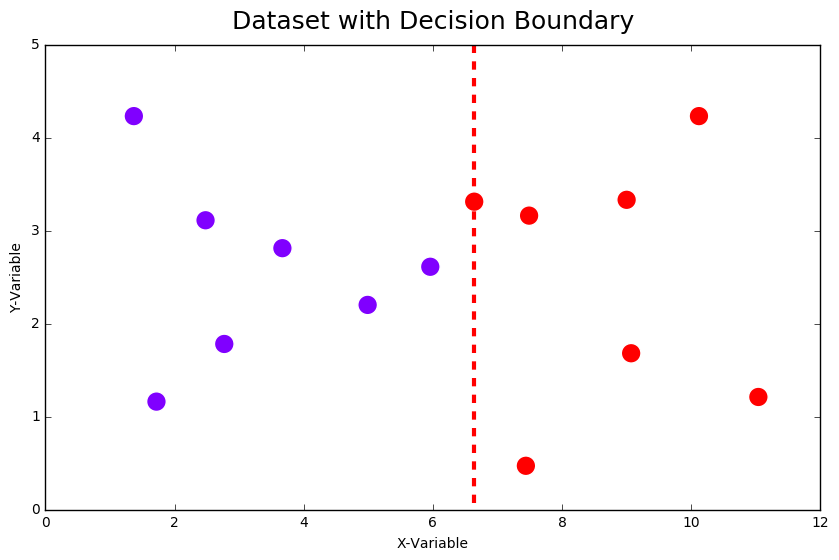

In [232]:
#Visualize Split
visual_split(dataset,split)

In [233]:
#Build Tree:
# tree = build_tree(dataset,2,1)